# Task 3: Customer Churn Prediction (Bank Customers)

---

### 👨‍💻 **Author: Abdul Samad**

- 🔗 **LinkedIn:**  
  [https://www.linkedin.com/in/abdulsamad577/](https://www.linkedin.com/in/abdulsamad577/)

- 🧠 **Kaggle Profile:**  
  [https://www.kaggle.com/samad0015](https://www.kaggle.com/samad0015)

- 💻 **GitHub Repository:**  
  [https://github.com/abdulsamad577/Internship_tasks](https://github.com/abdulsamad577/Internship_tasks)

---


# Introduction

### 🎯 Objective
The goal of this project is to predict which bank customers are likely to leave (churn). By identifying them early, the bank can take steps to retain them and avoid losing valuable clients.

### 📊 Dataset Overview
The dataset contains 10,000 customer records, each with 14 features. These features include customer demographics, account details, and whether the customer has exited the bank.

Quick summary:
- **Rows**: 10,000 customers
- **Columns**: 14 features
- **Target column**: `Exited` (1 = left the bank, 0 = stayed)

Feature types:
- **Numerical**: `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`
- **Categorical**: `Geography`, `Gender`
- **Identifiers** (not useful for training): `RowNumber`, `CustomerId`, `Surname`

This dataset will help us build a classification model to predict churn risk.

### 💡 Why It Matters
Predicting customer churn helps banks take action before losing customers. It improves customer service, increases satisfaction, and supports better business decisions using data-driven insights.


# Project Workflow Overview

Step-by-step summary of the process:

1. Import Libraries
2. Data Collection & Inspection 
3. Exploratory Data Analysis  
4. Data Cleaning  
5. Feature Encoding
6. Model Preparation  
7. Model Selection and Training 
8. Model Evaluation
9. Feature Importance Analysis
10. Conclusion & Insights

## 1. Import Libraries
Include all necessary libraries:

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



## 2. Data Collection & Inspection

In [2]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("adammaus/predicting-churn-for-bank-customers")
print("Path to dataset files:", path)
print("Files in dataset folder:")
print(os.listdir(path))
file=os.listdir(path)
file=file[0]

Path to dataset files: C:\Users\Sami\.cache\kagglehub\datasets\adammaus\predicting-churn-for-bank-customers\versions\1
Files in dataset folder:
['Churn_Modelling.csv']


In [3]:
df = pd.read_csv(os.path.join(path, file))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

> The Shape of the dataset is 10000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 3. Exploratory Data Analysis (EDA)

#### Customer Churn Distribution Plot

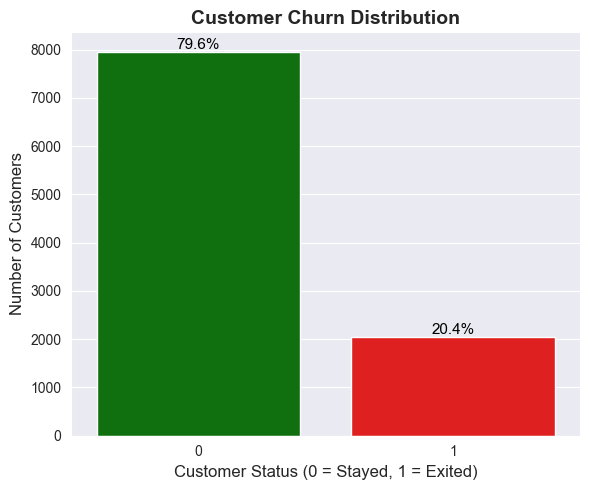

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 5))

# Countplot
ax = sns.countplot(data=df, x='Exited', palette=['green', 'red'])

# Add labels and title
plt.title('Customer Churn Distribution', fontsize=14, weight='bold')
plt.xlabel('Customer Status (0 = Stayed, 1 = Exited)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add percentage labels on bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()


#### Comparing Churn Across Different Regions


In [9]:
colors = {0: 'skyblue', 1: 'red'}

# Create the grouped bar chart
fig = px.histogram(
    df,
    x='Geography',
    color='Exited',
    color_discrete_map=colors,
    barmode='group',
    title='Churn by Geography'
)

# Make the chart look better
fig.update_layout(
    title_font_size=18,
    xaxis_title='Geography',
    yaxis_title='Customer Count',
    legend_title='Exited',
    template='plotly_white'
)

# Show the chart
fig.show()


#### Age Distribution by Customer Churn Status


In [10]:
fig = px.box(
    df,
    x='Exited',
    y='Age',
    color='Exited',
    title='Age vs. Churn (Exited)',
    color_discrete_map={0: 'green', 1: 'red'}
)

fig.update_layout(
    xaxis_title='Exited (0 = Stayed, 1 = Left)',
    yaxis_title='Age',
    title_x=0.5,
    template='simple_white',
    showlegend=False
)

fig.show()


#### Histogram Plots of Key Numerical Features

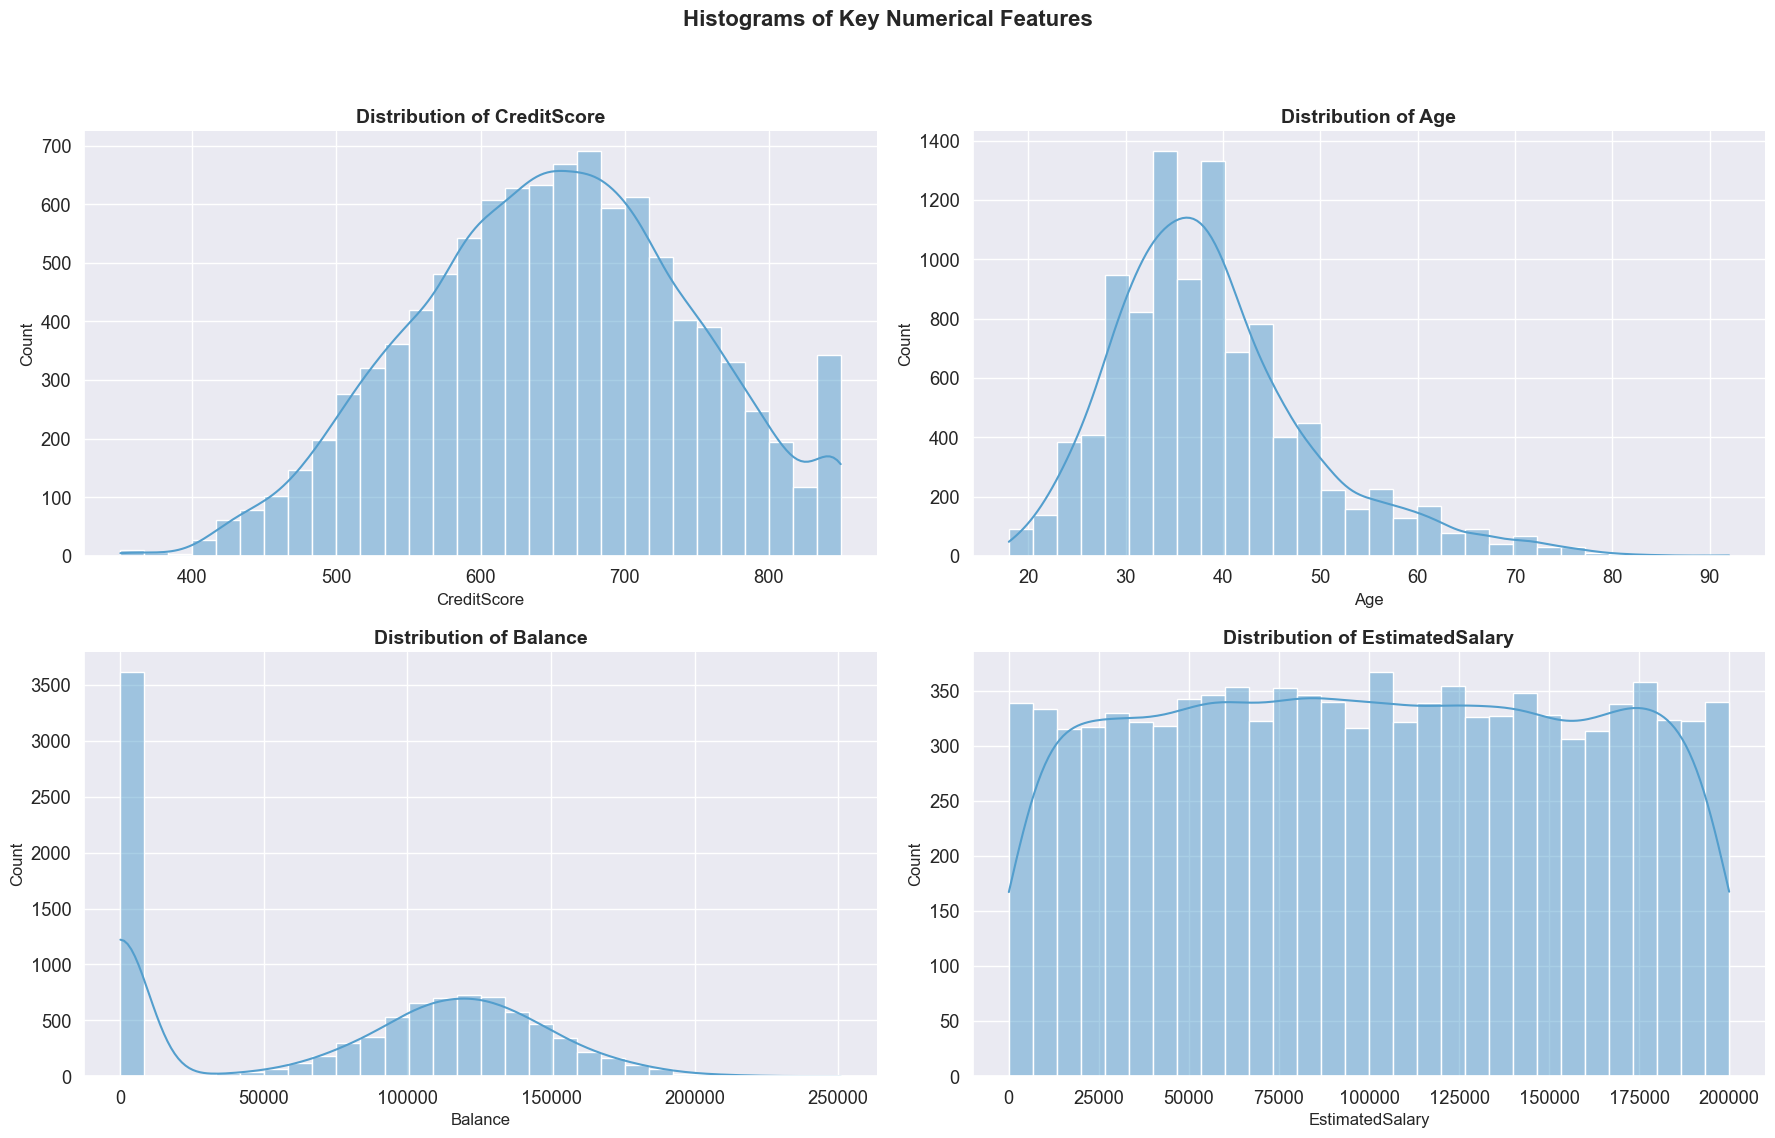

In [11]:
# Apply seaborn style for better aesthetics
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.2)

# List of numerical columns to include (excluding IDs and binary-like features)
columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Set up the matplotlib figure
num_plots = len(columns_to_plot)
rows = (num_plots + 2) // 3  # calculate rows needed
plt.figure(figsize=(18, 6 * rows))

# Loop through and plot each histogram
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color=sns.color_palette("Blues")[3])
    plt.title(f'Distribution of {col}', fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    sns.despine()

plt.suptitle("Histograms of Key Numerical Features", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Box Plots of Numerical Features

In [12]:
# List of numerical columns
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create subplot grid: 3 plots per row
rows = (len(columns_to_plot) + 2) // 3
fig = make_subplots(rows=rows, cols=3, subplot_titles=columns_to_plot)

# Add box plots
for i, col in enumerate(columns_to_plot):
    row = (i // 3) + 1
    col_pos = (i % 3) + 1
    fig.add_trace(
        go.Box(y=df[col], name=col, marker_color=px.colors.qualitative.Set2[i]),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    height=rows * 300,
    width=1000,
    title_text="Box Plots of Key Numerical Features",
    title_x=0.5,
    showlegend=False,
    template="plotly_white"
)

fig.show()


> According to the box plots, we can see that there are some outliers in the `CreditScore`, `Age`, and `Balance` features. These outliers are basically existing in the dataset and we will not remove them for now, as they might contain important information about the customers.

## 4. Data Cleaning

In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> There are no missing values in the dataset, so we can proceed to the next step without any imputation or removal of rows/columns.

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


> We have removed the `RowNumber`, `CustomerId`, and `Surname` columns as they are not useful for training the mode

## 5. Feature Encoding  

In [16]:
# Label encode 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-Hot encode 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


✔️ Our dataset is now ready for model training — with categorical features encoded and numerical values scaled properly.

## 6. Model Preparation

In [18]:
# 1. Define Features (X) and Target (y)
X = df.drop('Exited', axis=1)  # All columns except target
y = df['Exited']               # Target variable

# 2. Split into Train and Test Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 7. Model Selection and Training

In [19]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100,max_depth=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

# Train and test each model
for name, model in models.items():
    print(f"\nTraining Model: {name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    predictions = model.predict(X_test)
    
    # Print evaluation report
    print(classification_report(y_test, predictions))



Training Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.63      0.74      1607
           1       0.31      0.66      0.42       393

    accuracy                           0.64      2000
   macro avg       0.60      0.65      0.58      2000
weighted avg       0.77      0.64      0.68      2000


Training Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Training Model: XGBoost
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75  

#### Build the Final Model

In [20]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
y_pred=model.predict(X_test)

## 8. Model Evaluation

✅ Accuracy: 0.87
✅ Precision: 0.72
✅ Recall:    0.55
✅ F1-Score:  0.63


<Figure size 500x400 with 0 Axes>

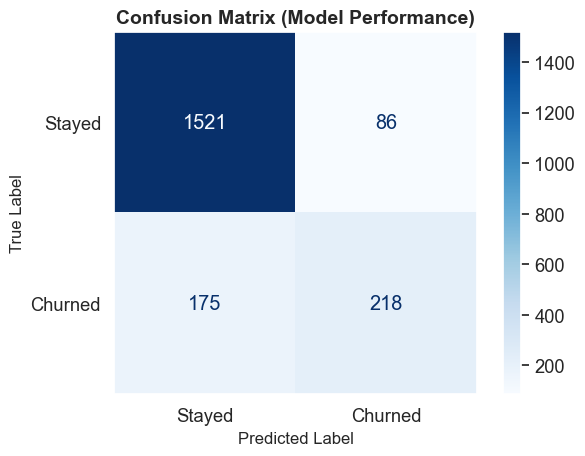

In [22]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# 2. Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall:    {recall:.2f}")
print(f"✅ F1-Score:  {f1:.2f}")

# 4. Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Stayed", "Churned"])

plt.figure(figsize=(5, 4))
disp.plot(cmap="Blues", values_format='d')  # show counts as integers
plt.title("Confusion Matrix (Model Performance)", fontsize=14, weight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # hide background grid
plt.tight_layout()
plt.show()



## 9. Feature Importance Analysis

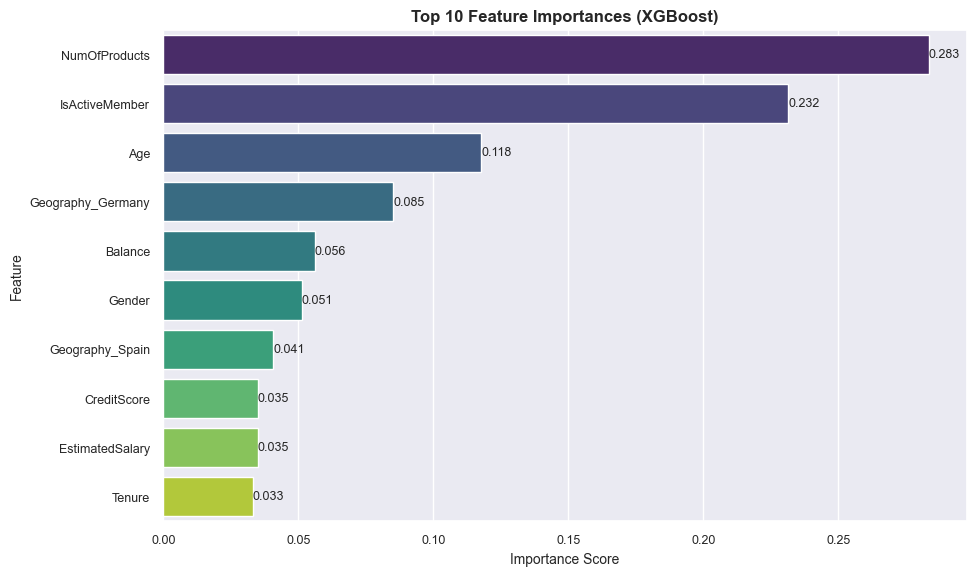

In [23]:
# Get feature importances from model
importances = model.feature_importances_
feature_names = X.columns

# Create a sorted DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(10),
    palette='viridis'
)

# Add importance score labels with smaller font size
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=9)

# Title and axis labels with smaller font
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=12, weight='bold')
plt.xlabel('Importance Score', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

## ✅ 10. Conclusion & Insights

####  Conclusion:

In this project, we successfully built an **XGBoost classification model** to predict customer churn using a dataset of 10,000 bank customers. The model achieved:

- ✅ **Accuracy**: 87%  
- ✅ **Precision**: 72%  
- ✅ **Recall**: 55%  
- ✅ **F1-Score**: 63%

While the model performs well overall, the recall indicates that it misses some actual churners — which is critical in customer retention. Improving recall (true positive rate) would help identify more at-risk customers.

---

#### Key Insights (Based on Feature Importance):

- 🔹 **NumOfProducts** is the top feature — customers with fewer products are more likely to churn.
- 🔹 **IsActiveMember** greatly impacts churn — inactive customers tend to leave more.
- 🔹 **Age** also plays a major role — older customers show higher churn probability.
- 🔹 **Geography_Germany** contributes more to churn compared to other countries.
- 🔹 **Balance** and **Gender** have a moderate impact on churn prediction.
- 🔹 Features like **CreditScore**, **EstimatedSalary**, and **Tenure** have smaller influence.
- 🔹 Interestingly, **Geography_Spain** shows lower importance, suggesting regional behavior differences.

---

#### Final Thought:

This model can help banks proactively target **inactive, low-product, older customers**, especially from **Germany**, to reduce churn. Further improvements in recall (e.g., via resampling or ensemble tuning) can make the model even more effective in real-world applications.
